In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential
import tensorflow.keras.preprocessing.image as p

from tensorflow.keras.datasets import cifar10

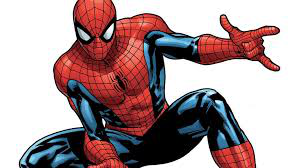

In [2]:
s=p.load_img('s.jpg')
s

In [3]:
train_datagen = p.ImageDataGenerator(rescale=1./255,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   shear_range = 0.5,
                                   brightness_range = [0.5, 1.5],
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest'
                                  )

In [4]:
imgarr = p.img_to_array(s)
imgarr=imgarr.reshape(1,168,299,3)

In [5]:
tgen = train_datagen.flow(imgarr)

In [6]:
type(tgen)

keras.preprocessing.image.NumpyArrayIterator

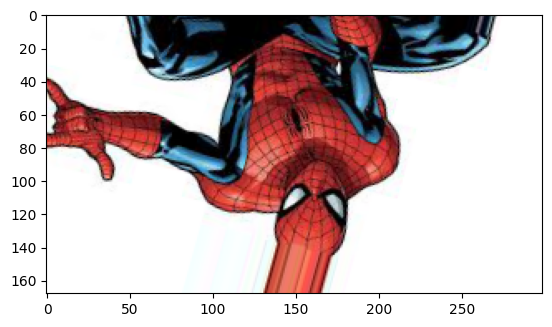

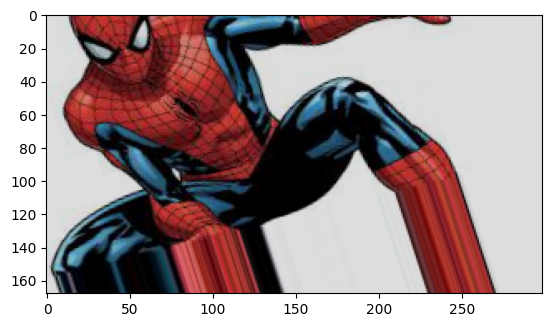

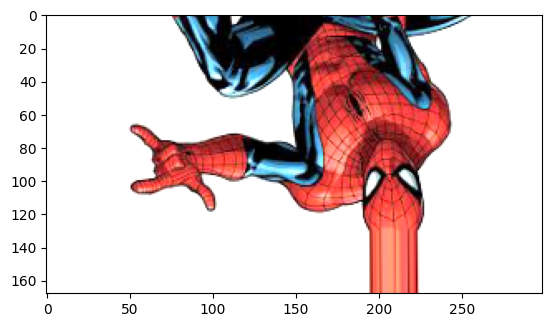

In [7]:
for i in range(3):
    plt.imshow(tgen.next().reshape(168,299,3))
    plt.show()

In [8]:
## cifar10

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [9]:
print("x_train.shape : ",x_train.shape)
print("x_test.shape : ",x_test.shape)
print("y_train.shape : ",y_train.shape)
print("y_test.shape : ",y_test.shape)

x_train.shape :  (50000, 32, 32, 3)
x_test.shape :  (10000, 32, 32, 3)
y_train.shape :  (50000, 1)
y_test.shape :  (10000, 1)


In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), strides=1,
                 input_shape=(32,32,3), activation='relu',padding='same'))
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
   5/1563 [..............................] - ETA: 21s - loss: 77.3000 - acc: 0.1125 

2022-12-09 10:28:29.609373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 13s 8ms/step - loss: 2.1320 - acc: 0.3300
Epoch 2/3
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3283 - acc: 0.5317
Epoch 3/3
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0414 - acc: 0.6362


1/1 [==============================] - 0s 182ms/step


2022-12-09 10:29:10.950049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


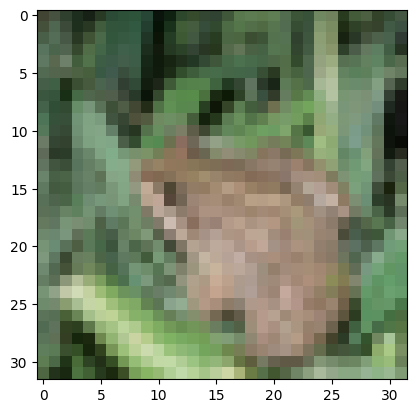

In [15]:
model.predict(x_test[4].reshape(1,32,32,3)).argmax()
plt.imshow(x_test[4])

In [18]:
train_datagen = p.ImageDataGenerator(
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   shear_range = 0.5,
                                   brightness_range = [0.5, 1.5],
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest'
                                  )

In [19]:
train_gen=train_datagen.flow(x_train,y_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), strides=1,
                 input_shape=(32,32,3), activation='relu',padding='same'))
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)
# model.fit(x_train,y_train,epochs=3)
model.fit(train_gen,epochs=3)